In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

plt.style.use('ggplot')

In [28]:
data_stock = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
data_energy = pd.read_csv('./data/Electric_Production.csv')

[*********************100%%**********************]  1 of 1 completed


In [30]:
data_stock = data_stock.iloc[:1000]
data_stock = data_stock[['Close']]

data_energy = data_energy[['DATE', 'Value']]
data_energy['DATE'] = pd.to_datetime(data_energy['DATE'])
data_energy = data_energy.set_index('DATE')

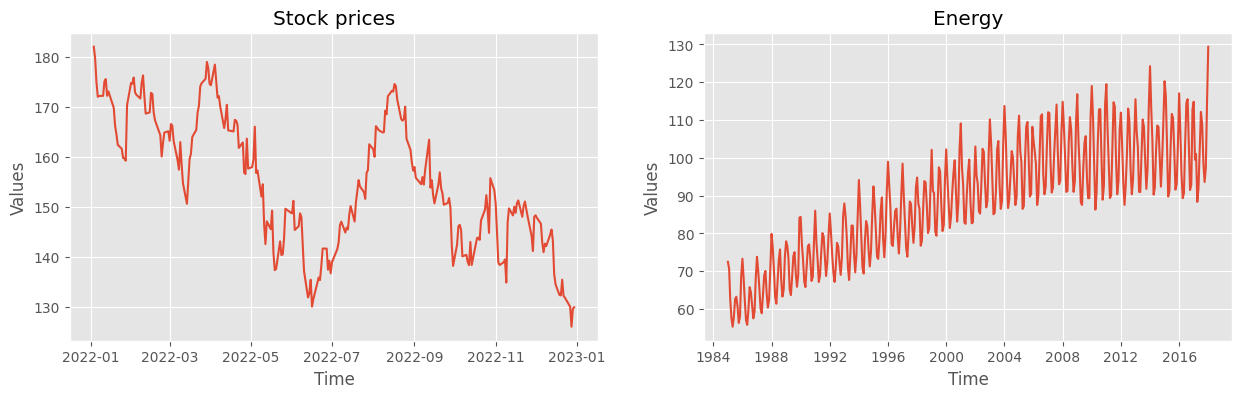

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(data_stock)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].set_title('Stock prices')

axs[1].plot(data_energy)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].set_title('Energy')

plt.subplots_adjust(wspace=0.2)
plt.show()

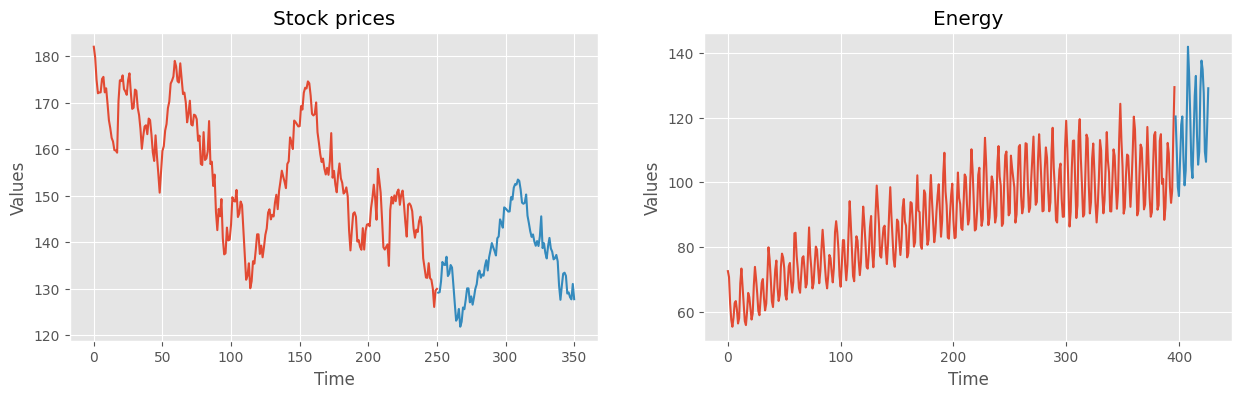

In [42]:
def forecast(data: np.array, h: int, m: int) -> np.array:
    z0 = data[-m:]
    z = [data[i : i+m] for i in range(len(data) - (m + h + 1), 0, -1)]
    max_idx = len(data) - (m + h + 1) - np.argmax(list(map(lambda x: np.cov(z0, x)[0, 1]/(np.std(x) * np.std(z0)), np.array(z))))
    zk = data[max_idx: max_idx + m].reshape(-1, 1)
    zk = np.hstack([zk, np.ones(m).reshape(-1, 1)])

    coef = np.matmul(np.matmul(zk.T, z0.reshape(-1, 1)).T, np.linalg.inv(np.matmul(zk.T, zk)))[0]

    return data[max_idx + m : max_idx + m + h] * coef[0] + coef[-1]

data_stock_pred = forecast(data_stock.values.reshape(-1), h=100, m=13)
data_energy_pred = forecast(data_energy.values.reshape(-1), h=30, m=6)

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)

axs[0].plot(np.arange(len(data_stock)), data_stock)
axs[0].plot(np.arange(len(data_stock_pred))+len(data_stock), data_stock_pred)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Values')
axs[0].set_title('Stock prices')

axs[1].plot(np.arange(len(data_energy)), data_energy)
axs[1].plot(np.arange(len(data_energy_pred))+len(data_energy), data_energy_pred)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Values')
axs[1].set_title('Energy')

plt.subplots_adjust(wspace=0.2)
plt.show()